In [1]:
%matplotlib inline


# 2D Optimal transport for different metrics


2D OT on empirical distributio  with different gound metric.

Stole the figure idea from Fig. 1 and 2 in
https://arxiv.org/pdf/1706.07650.pdf





In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot

Dataset 1 : uniform sampling
----------------------------



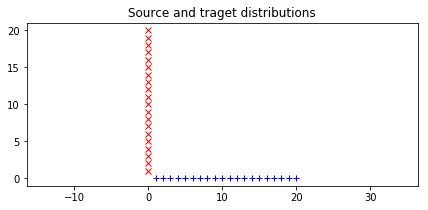

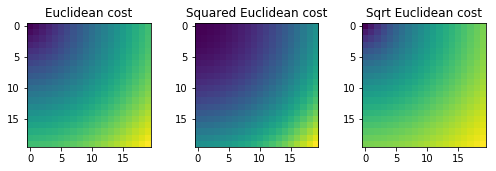

In [3]:
n = 20  # nb samples
xs = np.zeros((n, 2))
xs[:, 0] = np.arange(n) + 1
xs[:, 1] = (np.arange(n) + 1) * -0.001  # to make it strictly convex...

xt = np.zeros((n, 2))
xt[:, 1] = np.arange(n) + 1

a, b = ot.unif(n), ot.unif(n)  # uniform distribution on samples

# loss matrix
M1 = ot.dist(xs, xt, metric='euclidean')
M1 /= M1.max()

# loss matrix
M2 = ot.dist(xs, xt, metric='sqeuclidean')
M2 /= M2.max()

# loss matrix
Mp = np.sqrt(ot.dist(xs, xt, metric='euclidean'))
Mp /= Mp.max()

# Data
pl.figure(1, figsize=(7, 3))
pl.clf()
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
pl.title('Source and traget distributions')


# Cost matrices
pl.figure(2, figsize=(7, 3))

pl.subplot(1, 3, 1)
pl.imshow(M1, interpolation='nearest')
pl.title('Euclidean cost')

pl.subplot(1, 3, 2)
pl.imshow(M2, interpolation='nearest')
pl.title('Squared Euclidean cost')

pl.subplot(1, 3, 3)
pl.imshow(Mp, interpolation='nearest')
pl.title('Sqrt Euclidean cost')
pl.tight_layout()

Dataset 1 : Plot OT Matrices
----------------------------



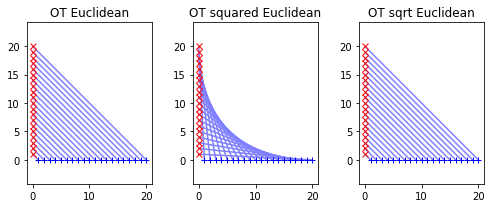

In [4]:
#%% EMD
G1 = ot.emd(a, b, M1)
G2 = ot.emd(a, b, M2)
Gp = ot.emd(a, b, Mp)

# OT matrices
pl.figure(3, figsize=(7, 3))

pl.subplot(1, 3, 1)
ot.plot.plot2D_samples_mat(xs, xt, G1, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
# pl.legend(loc=0)
pl.title('OT Euclidean')

pl.subplot(1, 3, 2)
ot.plot.plot2D_samples_mat(xs, xt, G2, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
# pl.legend(loc=0)
pl.title('OT squared Euclidean')

pl.subplot(1, 3, 3)
ot.plot.plot2D_samples_mat(xs, xt, Gp, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
# pl.legend(loc=0)
pl.title('OT sqrt Euclidean')
pl.tight_layout()

pl.show()

Dataset 2 : Partial circle
--------------------------



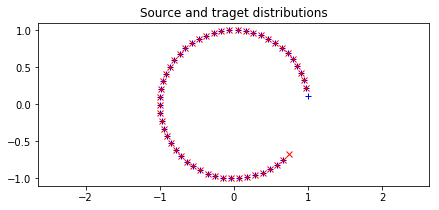

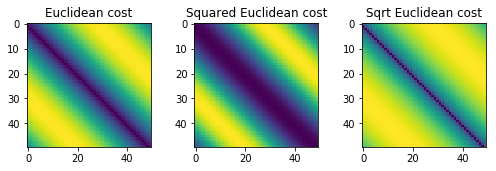

In [5]:
n = 50  # nb samples
xtot = np.zeros((n + 1, 2))
xtot[:, 0] = np.cos(
    (np.arange(n + 1) + 1.0) * 0.9 / (n + 2) * 2 * np.pi)
xtot[:, 1] = np.sin(
    (np.arange(n + 1) + 1.0) * 0.9 / (n + 2) * 2 * np.pi)

xs = xtot[:n, :]
xt = xtot[1:, :]

a, b = ot.unif(n), ot.unif(n)  # uniform distribution on samples

# loss matrix
M1 = ot.dist(xs, xt, metric='euclidean')
M1 /= M1.max()

# loss matrix
M2 = ot.dist(xs, xt, metric='sqeuclidean')
M2 /= M2.max()

# loss matrix
Mp = np.sqrt(ot.dist(xs, xt, metric='euclidean'))
Mp /= Mp.max()


# Data
pl.figure(4, figsize=(7, 3))
pl.clf()
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
pl.title('Source and traget distributions')


# Cost matrices
pl.figure(5, figsize=(7, 3))

pl.subplot(1, 3, 1)
pl.imshow(M1, interpolation='nearest')
pl.title('Euclidean cost')

pl.subplot(1, 3, 2)
pl.imshow(M2, interpolation='nearest')
pl.title('Squared Euclidean cost')

pl.subplot(1, 3, 3)
pl.imshow(Mp, interpolation='nearest')
pl.title('Sqrt Euclidean cost')
pl.tight_layout()

Dataset 2 : Plot  OT Matrices
-----------------------------



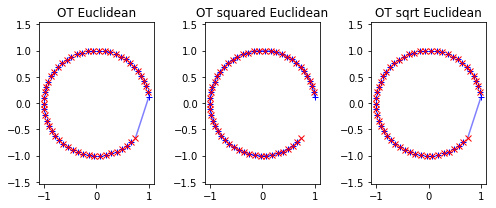

In [6]:
#%% EMD
G1 = ot.emd(a, b, M1)
G2 = ot.emd(a, b, M2)
Gp = ot.emd(a, b, Mp)

# OT matrices
pl.figure(6, figsize=(7, 3))

pl.subplot(1, 3, 1)
ot.plot.plot2D_samples_mat(xs, xt, G1, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
# pl.legend(loc=0)
pl.title('OT Euclidean')

pl.subplot(1, 3, 2)
ot.plot.plot2D_samples_mat(xs, xt, G2, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
# pl.legend(loc=0)
pl.title('OT squared Euclidean')

pl.subplot(1, 3, 3)
ot.plot.plot2D_samples_mat(xs, xt, Gp, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.axis('equal')
# pl.legend(loc=0)
pl.title('OT sqrt Euclidean')
pl.tight_layout()

pl.show()